<a href="https://colab.research.google.com/github/rtajeong/ChatGPT_for_Management/blob/main/10_stock_price_prediction_with_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction Using GPT
- Objective: Predict the next day's stock closing price using past data.
- Example: using time-series data forecasting in combination with fine-tuned GPT models.

## Data Preparation

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Fetch Historical Stock Data

def fetch_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']].copy()  # Ensure we copy the dataframe
    data.reset_index(inplace=True)  # Reset MultiIndex to single index
    data.columns = ['Date', 'Close']  # Rename columns for clarity
    data['Returns'] = data['Close'].pct_change()  # Calculate returns
    data.dropna(inplace=True)  # Drop NaN values
    return data

stock_symbol = 'AAPL'
data = fetch_stock_data(stock_symbol, '2020-01-01', '2023-01-01')
print()
print(data[:3])

[*********************100%***********************]  1 of 1 completed


        Date      Close   Returns
1 2020-01-03  72.088287 -0.009722
2 2020-01-06  72.662712  0.007968
3 2020-01-07  72.320976 -0.004703


In [ ]:
# Convert stock prices into a text sequence for GPT

sequence = ""
for i, price in enumerate(data['Close']):
    sequence += f"Day {i}: {price}\n"

# Save the sequence to a text file
data_file = "stock_data.txt"
with open(data_file, "w") as f:
    f.write(sequence)

!head -3 stock_data.txt

Day 0: 72.08828735351562
Day 1: 72.66271209716797
Day 2: 72.32097625732422


## 1_Direct GPT conversation
- Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïó¨Îü¨ Î∞©Î≤ïÏù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Íµ¨Ï≤¥Ï†ÅÏù∏ Î∞©Î≤ïÍπåÏßÄ Ï†úÏãúÌï¥ Ï£ºÎäî Í≤å Ï¢ãÏùÑ Í≤ÉÏûÑ.
  - Îã®Ïàú Ï∂îÏÑ∏ Î∂ÑÏÑù (Simple Trend Analysis)
  - Ïù¥Îèô ÌèâÍ∑† (Moving Average)
  - Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä (Linear Regression)
  - Î®∏Ïã†Îü¨Îãù/Îî•Îü¨Îãù Î™®Îç∏ (ML/DL Models)

```
- prompt:
  " Based on the following historical stock prices:
    Day 1: \$150
    Day 2: \$152
    Day 3: \$154
    Day 4: \$153
    Day 5: \$155
    What will be the stock price on Day 6? "

- response:
  " Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïùò Îã®Ïàú Ï∂îÏÑ∏ Î∂ÑÏÑù Í≤∞Í≥º, Day 6Ïùò Ï£ºÍ∞ÄÎäî ÏïΩ $156.25Î°ú ÏòàÏ∏°Îê©ÎãàÎã§.
  Í∑∏Îü¨ÎÇò, ÏãúÏû•ÏùÄ Ïó¨Îü¨ ÏöîÏù∏Ïóê ÏùòÌï¥ ÏòÅÌñ•ÏùÑ Î∞õÏúºÎØÄÎ°ú ÏòàÏ∏°Ïóê ÎåÄÌïú Î∂àÌôïÏã§ÏÑ±Ïù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§."
```

## 2_Using Open AI API

In [ ]:
import openai

# Set your OpenAI API key
from google.colab import drive
drive.mount('/content/drive')

api_key_file = '/content/drive/My Drive/Colab Notebooks/api_key.txt'

with open(api_key_file, 'r') as f:
    api_key = f.read().strip()

# import openai
# import os
# os.environ['OPENAI_API_KEY'] = api_key

Mounted at /content/drive


In [ ]:
client = openai.OpenAI(api_key=api_key)

# Define the prompt
prompt = """
Based on the following historical stock prices:
Day 1: $150
Day 2: $152
Day 3: $154
Day 4: $153
Day 5: $155
What will be the stock price on Day 6?
"""

# Send the prompt to GPT
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user",
               "content": prompt,}]
)

# Extract the generated text
predicted_price = response.choices[0].message.content
print(f"Predicted Stock Price: {predicted_price}")


Predicted Stock Price: There is not enough information to accurately predict the stock price on Day 6 based solely on the historical prices provided. Stock prices are influenced by various factors such as market trends, company performance, economic conditions, and investor sentiment. It is best to conduct a thorough analysis using additional data and information before making any predictions about future stock prices.


In [ ]:
predicted_price

'There is not enough information to accurately predict the stock price on Day 6 based solely on the historical prices provided. Stock prices are influenced by various factors such as market trends, company performance, economic conditions, and investor sentiment. It is best to conduct a thorough analysis using additional data and information before making any predictions about future stock prices.'

## 3_Fine-tuned GPT model
- Í∞úÎÖê: GPT-2 ÎòêÎäî GPT-3Î•º ÌäπÏ†ï Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÎØ∏ÏÑ∏ Ï°∞Ï†ïÌïòÏó¨ ÏÇ¨Ïö©.
  - Ïû•Ï†ê:
    - ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏÑ±Îä• Ìñ•ÏÉÅ.
    - Ïû¨ÌïôÏäµ ÏóÜÏù¥ ÏßÅÏ†ë ÏÇ¨Ïö© Í∞ÄÎä•.
  - Îã®Ï†ê:
    - ÎØ∏ÏÑ∏ Ï°∞Ï†ïÏóêÎäî Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÏôÄ Ï∂îÍ∞Ä ÌõàÎ†® ÏãúÍ∞ÑÏù¥ ÌïÑÏöî.
    - ÌïòÎìúÏõ®Ïñ¥ ÏöîÍµ¨ ÏÇ¨Ìï≠Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏùå.
- Î≥∏ ÏòàÏ†úÏùò Í≤ΩÏö∞:
  - ÏûÖÎ†•(X): ÏµúÍ∑º 5ÏùºÍ∞ÑÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞
  - Ï∂úÎ†•(y): Îã§Ïùå ÎÇ†(Day 6)Ïùò Ï£ºÍ∞Ä ÏòàÏ∏°

In [ ]:
!pip install transformers datasets

In [ ]:
pd.concat([data.head(3), data.tail(3)])

Date       Close   Returns
1   2020-01-03   74.357498 -0.009722
2   2020-01-06   74.949997  0.007968
3   2020-01-07   74.597504 -0.004703
753 2022-12-28  126.040001 -0.030685
754 2022-12-29  129.610001  0.028324
755 2022-12-30  129.929993  0.002469

- Prepare the Dataset
  - Format the data for GPT fine-tuning. We convert stock prices into a sequence of days with the next day‚Äôs price as the target.

In [ ]:
# Create sequences for training
sequence_length = 5  # Number of days in input sequence
formatted_data = []

for i in range(len(data) - sequence_length):
    input_sequence = ", ".join(
        [f"Day {j+1}: ${data['Close'].iloc[i+j].item():.2f}" for j in range(sequence_length)]
    )
    target = f"${data['Close'].iloc[i + sequence_length].item():.2f}"
    formatted_data.append(f"{input_sequence} -> {target}")

# Save formatted data to a text file
with open("train_data.txt", "w") as f:
    for line in formatted_data:
        f.write(line + "\n")

print("Training data saved to 'train_data.txt'.")

Training data saved to 'train_data.txt'.


In [ ]:
input_sequence, target

('Day 1: $130.85, Day 2: $130.49, Day 3: $128.68, Day 4: $124.73, Day 5: $128.26',
 '$128.58')

In [ ]:
formatted_data[-3:]

['Day 1: $132.30, Day 2: $135.45, Day 3: $132.23, Day 4: $131.86, Day 5: $130.03 -> $126.04',
 'Day 1: $135.45, Day 2: $132.23, Day 3: $131.86, Day 4: $130.03, Day 5: $126.04 -> $129.61',
 'Day 1: $132.23, Day 2: $131.86, Day 3: $130.03, Day 4: $126.04, Day 5: $129.61 -> $129.93']

- Fine-tune GPT
  - fine-tuningÏóêÏÑúÎäî Í∏∞Ï°¥Ïùò ÌïôÏäµÎêú Í∞ÄÏ§ëÏπòÍ∞Ä Ïú†ÏßÄÎêòÎ©∞, ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å Ï°∞Í∏àÏî© Ï°∞Ï†ïÎêúÎã§. (Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞Í∞Ä update ÎêúÎã§)
  - Îî∞ÎùºÏÑú, Í∏∞Ï°¥Ïóê ÌïôÏäµÎêú Ïñ∏Ïñ¥Ï†Å Ìå®ÌÑ¥Ïù¥ÎÇò Íµ¨Ï°∞Îäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄÌïòÎ©¥ÏÑú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌïòÍ≤å ÎêúÎã§.

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling, TrainingArguments, Trainer

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')  # gpt2 tokenizer (converts text into token IDs and vice versa)
model = GPT2LMHeadModel.from_pretrained('gpt2')    # ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Í∞ÄÏ§ëÏπò(Pre-trained Weights)Î•º Î∂àÎü¨Ïò®Îã§

# Load the dataset
train_dataset = TextDataset(                       # helper class to load text data for training
    tokenizer=tokenizer,
    file_path='train_data.txt',  # Path to training data
    block_size=128,              # Max token length per sequence
)

# Create a data collator (data batch Î•º Íµ¨ÏÑ±ÌïòÎäî  ÏûëÏóÖ)
data_collator = DataCollatorForLanguageModeling(    # Prepares batches of text for training
    tokenizer=tokenizer,
    mlm=False,  # Causal language modeling (no masking)
)

# Set up training arguments
training_args = TrainingArguments(   # Configuration for training: epochs, batch size, ...
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,              #
    per_device_train_batch_size=4,   #
    save_steps=500,
    save_total_limit=2,
    learning_rate=5e-5,              #
    report_to="none",       # disable wandb or other loggers
)

# Fine-tune the model (Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏóÖÎç∞Ïù¥Ìä∏Îê®)
trainer = Trainer(          # High-level API to train and fine-tune models
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,  # ÎèÑÎ©îÏù∏ ÌäπÌôî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã
)

trainer.train()

# Save the fine-tuned model
trainer.save_model("./fine_tuned_gpt2")
tokenizer.save_pretrained("./fine_tuned_gpt2")

print("Model fine-tuning complete and saved to './fine_tuned_gpt2'.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the ü§ó Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Model fine-tuning complete and saved to './fine_tuned_gpt2'.


- Prepare Test Data

In [ ]:
test_data = data[-(sequence_length + 10):]  # Use the last 10 days for testing
test_sequences = []

for i in range(len(test_data) - sequence_length):
    input_sequence = ", ".join(
        [f"Day {j+1}: ${test_data['Close'].iloc[i+j].item():.2f}" for j in range(sequence_length)]
    )
    target = test_data['Close'].iloc[i + sequence_length].item()
    test_sequences.append((input_sequence, target))

In [ ]:
test_sequences

[('Day 1: $142.16, Day 2: $144.49, Day 3: $145.47, Day 4: $143.21, Day 5: $136.50',
  134.50999450683594),
 ('Day 1: $144.49, Day 2: $145.47, Day 3: $143.21, Day 4: $136.50, Day 5: $134.51',
  132.3699951171875),
 ('Day 1: $145.47, Day 2: $143.21, Day 3: $136.50, Day 4: $134.51, Day 5: $132.37',
  132.3000030517578),
 ('Day 1: $143.21, Day 2: $136.50, Day 3: $134.51, Day 4: $132.37, Day 5: $132.30',
  135.4499969482422),
 ('Day 1: $136.50, Day 2: $134.51, Day 3: $132.37, Day 4: $132.30, Day 5: $135.45',
  132.22999572753906),
 ('Day 1: $134.51, Day 2: $132.37, Day 3: $132.30, Day 4: $135.45, Day 5: $132.23',
  131.86000061035156),
 ('Day 1: $132.37, Day 2: $132.30, Day 3: $135.45, Day 4: $132.23, Day 5: $131.86',
  130.02999877929688),
 ('Day 1: $132.30, Day 2: $135.45, Day 3: $132.23, Day 4: $131.86, Day 5: $130.03',
  126.04000091552734),
 ('Day 1: $135.45, Day 2: $132.23, Day 3: $131.86, Day 4: $130.03, Day 5: $126.04',
  129.61000061035156),
 ('Day 1: $132.23, Day 2: $131.86, Day 3

- Generate Predictions
- tokenizer.encode(): ÌÖçÏä§Ìä∏(sequence)Î•º Ïà´Ïûê ÌÜ†ÌÅ∞ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò.
  - Ïòà: "Hello, world!" ‚Üí [15496, 11, 995]
  - Í∞Å Ïà´ÏûêÎäî GPT Î™®Îç∏Ïùò Ïñ¥Ìúò(vocabulary)ÏóêÏÑú Ìï¥Îãπ Îã®Ïñ¥Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§.
  - return_tensors="pt": PyTorch ÌÖêÏÑú ÌòïÏãùÏúºÎ°ú Î∞òÌôò. (PyTorch Í∏∞Î∞ò Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöî.), Ïòà: tensor([[15496, 11, 995]]).
- model.generate(): GPT Î™®Îç∏Ïù¥ ÏûÖÎ†• ÌÖçÏä§Ìä∏Î•º Í∏∞Î∞òÏúºÎ°ú ÏÉàÎ°úÏö¥ ÌÖçÏä§Ìä∏Î•º ÏÉùÏÑ±
  - input_ids: Î™®Îç∏Ïóê ÏûÖÎ†•ÏúºÎ°ú Ï†úÍ≥µÎêòÎäî ÌÜ†ÌÅ∞ ÏãúÌÄÄÏä§.
  - max_length: ÏÉùÏÑ±ÎêòÎäî ÌÖçÏä§Ìä∏Ïùò ÏµúÎåÄ Í∏∏Ïù¥.
  - temperature=0.7: ÏÉùÏÑ± ÌÖçÏä§Ìä∏Ïùò Îã§ÏñëÏÑ±ÏùÑ Ï°∞Ï†à (ÎÜíÏùÑÏàòÎ°ù Ï∞ΩÏùòÏ†Å)
  - num_return_sequences=1: Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìï† ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Ïùò Ïàò (1Î°ú ÏÑ§Ï†ï Ïãú Ìïú Î≤àÏóê ÌïòÎÇòÏùò ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Îßå Î∞òÌôò)
- tokenizer.decode(): Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÌÜ†ÌÅ∞ ÏãúÌÄÄÏä§Î•º ÏÇ¨ÎûåÏù¥ ÏùΩÏùÑ Ïàò ÏûàÎäî ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôò
  - Ïòà: [15496, 11, 995] ‚Üí "Hello, world!"

In [ ]:
import re

# Load fine-tuned model
tokenizer = GPT2Tokenizer.from_pretrained('./fine_tuned_gpt2')
model = GPT2LMHeadModel.from_pretrained('./fine_tuned_gpt2')

predicted_values = []
actual_values = []

for input_sequence, target in test_sequences:
    # Tokenize and predict
    input_ids = tokenizer.encode(input_sequence + " ->", return_tensors='pt')
    output = model.generate(input_ids,
                            max_length=50,
                            num_return_sequences=1,
                            pad_token_id=tokenizer.eos_token_id)

    # Decode and extract the predicted value
    predicted_text = tokenizer.decode(output[0], skip_special_tokens=True)
    match = re.search(r"->\s*\$(\d+\.\d+)", predicted_text)
    if match:
        predicted_value = float(match.group(1))   # the first captured group defined in the regular expression
        predicted_values.append(predicted_value)
        actual_values.append(target)

In [ ]:
print(match)
match.group(0), match.group(1)

<re.Match object; span=(79, 89), match='-> $128.81'>


('-> $128.81', '128.81')

In [ ]:
actual_values[:5], predicted_values[:5], len(actual_values), len(predicted_values)

([134.50999450683594,
  132.3699951171875,
  132.3000030517578,
  135.4499969482422,
  132.22999572753906],
 [136.81, 133.81, 132.72, 132.03, 134.81],
 10,
 10)

- Evaluate Performance

RMSE: 2.61
MAE: 2.18


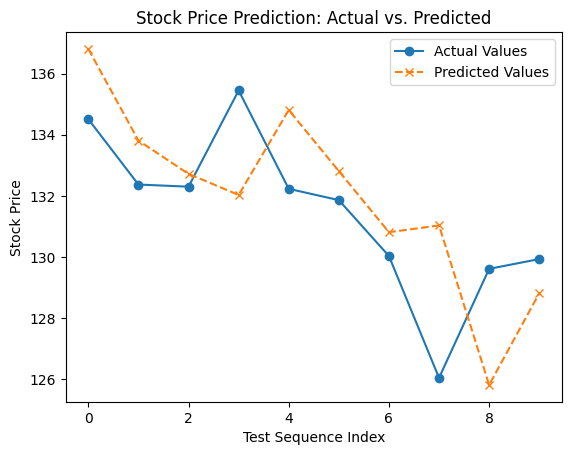

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate RMSE and MAE
rmse = mean_squared_error(actual_values, predicted_values)**0.5
mae = mean_absolute_error(actual_values, predicted_values)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot Actual vs. Predicted Values
plt.plot(actual_values, label="Actual Values", marker="o")
plt.plot(predicted_values, label="Predicted Values", marker="x", linestyle="--")
plt.title("Stock Price Prediction: Actual vs. Predicted")
plt.xlabel("Test Sequence Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

- It seems that the predicted values (orange dashed line) lag the actual values (blue line) by one period, which means the model is consistently predicting the previous day's stock price for the current day.
- To improve performance:
  - Enhance Input Data: add mode features like volume, technical indicator, sentiment scores, and use longer sequence
  - Use better model
  - Incorporate Statistical Models:
  - Increase Training Data:


## 4_Pre-trained GPT (without fine tuning)
  - just skip the fine-tuning precess in the previous example

RMSE: 3.45
MAE: 2.64


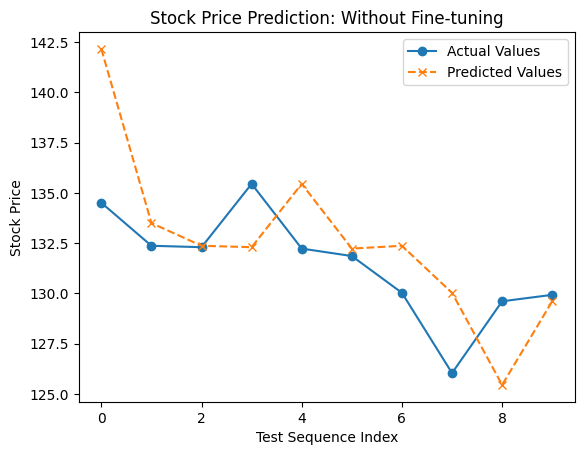

In [ ]:
# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# prepare test data

test_data = data[-(sequence_length + 10):]  # Use the last 10 days for testing
test_sequences = []

for i in range(len(test_data) - sequence_length):
    input_sequence = ", ".join(
        [f"Day {j+1}: ${test_data['Close'].iloc[i+j].item():.2f}" for j in range(sequence_length)]
    )
    target = test_data['Close'].iloc[i + sequence_length].item()
    test_sequences.append((input_sequence, target))

# generate predictions

predicted_values = []
actual_values = []

for input_sequence, target in test_sequences:
    # Tokenize and predict
    input_ids = tokenizer.encode(input_sequence + " ->", return_tensors='pt')
    output = model.generate(input_ids,
                            max_length=50,
                            num_return_sequences=1,
                            pad_token_id=tokenizer.eos_token_id)

    # Decode and extract the predicted value
    predicted_text = tokenizer.decode(output[0], skip_special_tokens=True)
    match = re.search(r"->\s*\$(\d+\.\d+)", predicted_text)
    if match:
        predicted_value = float(match.group(1))   # the first captured group defined in the regular expression
        predicted_values.append(predicted_value)
        actual_values.append(target)

# Calculate RMSE and MAE
rmse = mean_squared_error(actual_values, predicted_values)**0.5
mae = mean_absolute_error(actual_values, predicted_values)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plot Actual vs. Predicted Values
plt.plot(actual_values, label="Actual Values", marker="o")
plt.plot(predicted_values, label="Predicted Values", marker="x", linestyle="--")
plt.title("Stock Price Prediction: Without Fine-tuning")
plt.xlabel("Test Sequence Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

- summary:
  1. Fetch stock price data using yfinance.
  2. Prepare the data in the correct format for fine-tuning GPT-2.
  3. Fine-tune GPT-2 on the stock price dataset.
  4. Use the fine-tuned model to predict future stock prices.
  5. Compare predictions with actual values and evaluate performance using RMSE and MAE.

## ARIMA Î™®Îç∏
- Í∞úÎÖê: ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÏó¨ ÏòàÏ∏°.
- Ïû•Ï†ê:
  - ÌäπÏ†ï ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏµúÏ†ÅÌôî.
  - ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù Í∏∞Î∞òÏùò ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä•.
- Îã®Ï†ê:
  - Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ†ÌòïÏ†Å Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßà ÎïåÏóêÎßå Ïûò ÎèôÏûë.
  - ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ÏóêÎäî ÏïΩÌï®.

In [1]:
!pip install pmdarima

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 64.2 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

def fetch_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']].copy()  # Ensure we copy the dataframe
    data.reset_index(inplace=True)  # Reset MultiIndex to single index
    data.columns = ['Date', 'Close']  # Rename columns for clarity
    data.dropna(inplace=True)  # Drop NaN values
    return data

stock_symbol = 'AAPL'
data = fetch_stock_data(stock_symbol, '2020-01-01', '2023-01-01')

df = data[['Date', 'Close']]  # Include 'Date' column


[*********************100%***********************]  1 of 1 completed


<ipython-input-3-31c6e2cdc259>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Close'].fillna(method='ffill', inplace=True)
<ipython-input-3-31c6e2cdc259>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['Close'].fillna(method='ffill', inplace=True)


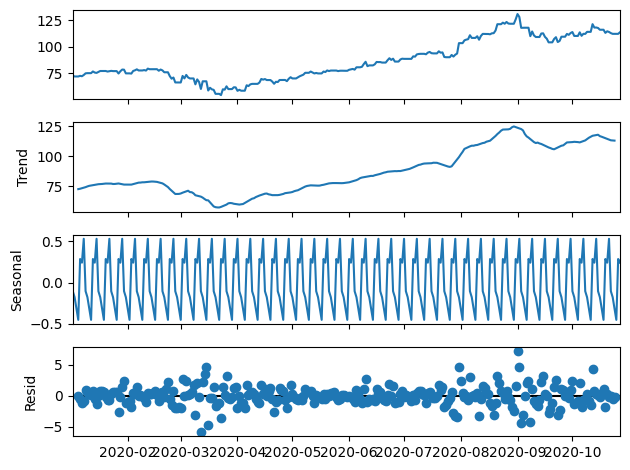

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
df2 = df.copy()
# Convert 'Date' column to datetime and set as index
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)
df2 = df2.asfreq('D')  # daily frequency
# Fill missing values using forward fill
df2['Close'].fillna(method='ffill', inplace=True)
# Perform seasonal decomposition
decomposition = seasonal_decompose(df2[:300], model='additive')  # first 300
fig = decomposition.plot()
plt.show()

- Ï†ïÏÉÅÏÑ± ÌÖåÏä§Ìä∏:ARIMA Î™®Îç∏ÏùÄ Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏ†ïÌïòÍ≥† ÏûàÏùå.
  - ADF (Augmented Dickey-Fuller) Test

In [4]:
# Ï†ïÏÉÅÏÑ± ÌÖåÏä§Ìä∏

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is not stationary")
else:
    print("Data is stationary")

ADF Statistic: -1.8889079375984732
p-value: 0.3372970235967753
Data is not stationary


<Axes: >

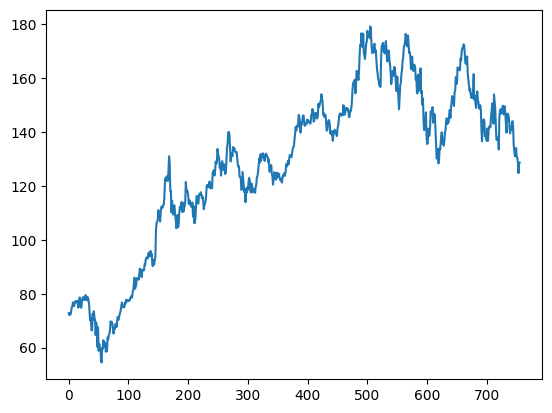

In [5]:
data['Close'].plot()

- Í≤∞Í≥º:
  - p-value > 0.05: Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå.
  - p-value <= 0.05: Ï†ïÏÉÅÏÑ± ÎßåÏ°±.

- Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò

In [6]:
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
# Ï∞®Î∂Ñ(Differencing): Ï†ïÏÉÅÏÑ±Ïù¥ Î∂ÄÏ°±Ìïú Í≤ΩÏö∞, Ï∞®Î∂ÑÏùÑ ÏàòÌñâ

data['Close_Diff'] = data['Close'].diff().dropna()  # ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Î∂Ñ Í≥ÑÏÇ∞

result = adfuller(data['Close_Diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is not stationary after first differencing")
else:
    print("Data is stationary after first differencing")

ADF Statistic: -29.167875105656453
p-value: 0.0
Data is stationary after first differencing


<Axes: >

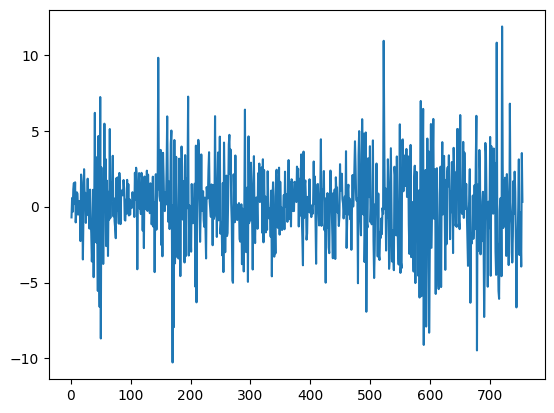

In [7]:
data['Close_Diff'].plot()

- Í≤∞Í≥º:
  - ADF Statistic: Îß§Ïö∞ ÏûëÏùÄ Í∞í, Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ïÌïòÍ≤å ÎßåÏ°±Ìï®.
  - p-value: 0.05Î≥¥Îã§ Ìõ®Ïî¨ ÏûëÏùå
  - Í∑ÄÎ¨¥Í∞ÄÏÑ§(H‚ÇÄ: Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÏÉÅÏ†ÅÏù¥ÏßÄ ÏïäÎã§)ÏùÑ Í∏∞Í∞Å.
  - Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÏÉÅÏ†Å(Stationary)Ïù¥ÎùºÍ≥† Í≤∞Î°†.

- ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï
  - Auto-ARIMA ÏÇ¨Ïö©: Auto-ARIMAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏäµÎãàÎã§

In [8]:
!pip install pmdarima

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Í≤ΩÍ≥† Î¨¥Ïãú

In [10]:
# Auto-ARIMAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò (p, d, q)Î•º ÏûêÎèôÏúºÎ°ú ÏÑ†ÌÉù
from pmdarima import auto_arima

stepwise_fit = auto_arima(data['Close'], seasonal=False, trace=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3671.878, Time=10.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3669.138, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3668.274, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3668.101, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3667.687, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3669.264, Time=2.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 14.027 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  756
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1832.843
Date:                Sat, 11 Jan 2025   AIC                           3667.687
Time:                        14:16:29   BIC                           3672.313
Sample:                             0   HQIC                          3669.469
        

In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Step 1: Fetch Historical Stock Data
def fetch_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']].copy()  # Ensure we copy the dataframe
    data.reset_index(inplace=True)  # Reset MultiIndex to single index
    data.columns = ['Date', 'Close']  # Rename columns for clarity
    data.dropna(inplace=True)  # Drop NaN values
    return data

stock_symbol = 'AAPL'
data = fetch_stock_data(stock_symbol, '2020-01-01', '2023-12-31')

# Step 2: Prepare Data for ARIMA

df = data[['Date', 'Close']]  # Include 'Date' column

# Step 3: Split Data into Training and Test Sets
split_index = int(len(df) * 0.8)  # 80% for training, 20% for testing
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

[*********************100%***********************]  1 of 1 completed


In [17]:
# Step 4: Auto-ARIMA to Find Optimal Parameters

stepwise_fit = auto_arima(train_data['Close'], seasonal=False, trace=True)
optimal_order = stepwise_fit.order  # (p, d, q)
print(f"Optimal ARIMA Order: {optimal_order}")

# Step 5: Fit ARIMA Model on Training Data

model = ARIMA(train_data['Close'], order=optimal_order)
# model = ARIMA(train_data['Close'], order=(7,1,10))   # ÏàòÎèô
model_fit = model.fit()
print(model_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3891.661, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3888.741, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3887.878, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3887.703, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3887.722, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3888.861, Time=2.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3889.041, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3890.828, Time=1.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3886.822, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3888.086, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3888.230, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3886.981, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3890.053, Time=0.49 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.965 seconds
Optimal ARIMA Order: (

In [18]:
# Step 6: Predict on Test Data
forecast_diff = model_fit.get_prediction(start=split_index, end=len(df)-1)
predicted_mean = forecast_diff.predicted_mean
confidence_intervals = forecast_diff.conf_int()

predicted_original_scale = predicted_mean   # Ï∞®Î∂ÑÍ∞íÏù¥ Ïù¥ÎØ∏ Î∞òÏòÅÎêòÏñ¥ ÏûàÏùå.

In [19]:
# Step 7: Combine Predictions with Actual Values
combined_df = pd.concat([train_data, test_data]) # Create combined_df from train_data and test_data
combined_df['Predicted'] = np.nan
combined_df.loc[test_data.index, 'Predicted'] = predicted_original_scale.values # Use test_data.index for alignment

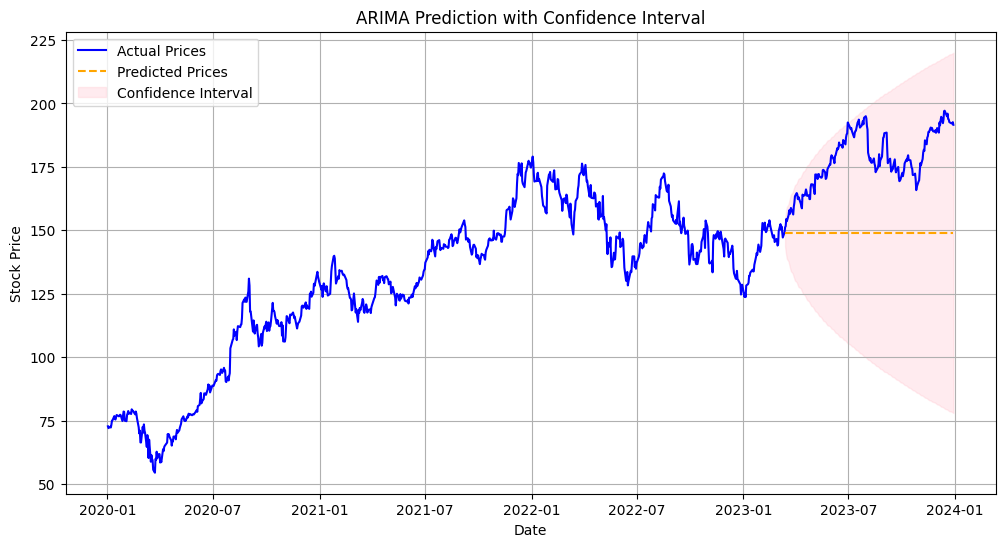

In [20]:
# Step 8: Plot Actual vs Predicted Prices with Confidence Intervals
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], label="Actual Prices", color="blue")  # Ïã§Ï†ú Í∞í
plt.plot(combined_df['Date'][split_index:], combined_df['Predicted'][split_index:], label="Predicted Prices", color="orange", linestyle="--")  # ÏòàÏ∏° Í∞í
plt.fill_between(
    combined_df['Date'][split_index:],
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink', alpha=0.3, label="Confidence Interval"
)
plt.legend()
plt.title("ARIMA Prediction with Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid()
plt.show()

## ARIMA - ÏàúÏ∞®Ï†Å ÏòàÏ∏°

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2300.641, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2299.632, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2295.392, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2295.682, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2301.320, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2297.140, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2297.006, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2299.003, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2297.975, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.266 seconds
Optimal ARIMA Order: (1, 1, 0)


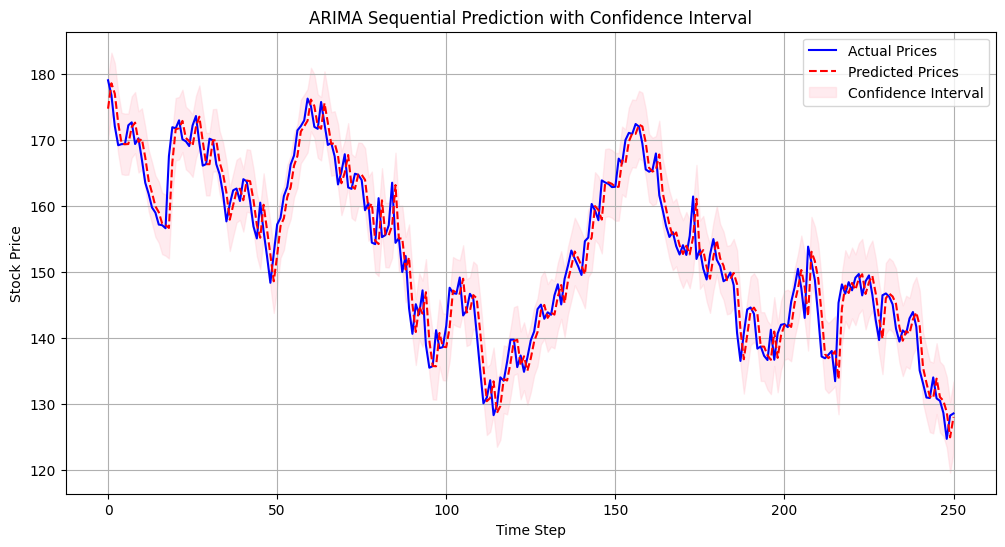

In [21]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Step 1: Fetch Historical Stock Data
def fetch_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']].copy()  # Ensure we copy the dataframe
    data.reset_index(inplace=True)  # Reset MultiIndex to single index
    data.columns = ['Date', 'Close']  # Rename columns for clarity
    data.dropna(inplace=True)  # Drop NaN values
    return data

stock_symbol = 'AAPL'
data = fetch_stock_data(stock_symbol, '2020-01-01', '2023-01-01')

# Step 2: Prepare Data for ARIMA
# Use only the 'Close' prices for ARIMA model
df = data[['Close']]

# Step 3: Split Data into Training and Test Sets
# Change test start date to 2022-01-01
split_index = data[data['Date'] == '2022-01-03'].index[0]  # Start test from 2022-01-03
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Step 4: Auto-ARIMA to Find Optimal Parameters
stepwise_fit = auto_arima(train_data['Close'], seasonal=False, trace=True)
optimal_order = stepwise_fit.order
print(f"Optimal ARIMA Order: {optimal_order}")

# Step 5: Sequential Prediction for Test Data
history = list(train_data['Close'])  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
predictions = []  # ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
conf_intervals = []  # Ïã†Î¢∞ Íµ¨Í∞Ñ Ï†ÄÏû•

for actual in test_data['Close']:
    # ARIMA Î™®Îç∏ ÌïôÏäµ
    model = ARIMA(history, order=optimal_order)
    model_fit = model.fit()

    # Îã§Ïùå ÏãúÏ†ê ÏòàÏ∏°
    forecast = model_fit.get_forecast(steps=1)  # Ìïú ÏãúÏ†êÎßå ÏòàÏ∏°
    predictions.append(forecast.predicted_mean[0])  # ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
    conf_int = forecast.conf_int()  # Ïã†Î¢∞ Íµ¨Í∞Ñ Ï†ÄÏû•
    conf_intervals.append(conf_int[0])

    # Ïã§Ï†ú Í∞íÏùÑ historyÏóê Ï∂îÍ∞Ä
    history.append(actual)

# Combine predictions with actual values
combined_df = test_data.copy()
combined_df['Predicted'] = predictions
conf_intervals = np.array(conf_intervals)  # Ïã†Î¢∞ Íµ¨Í∞ÑÏùÑ NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò

# Plot Actual vs Predicted Prices with Confidence Intervals
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'].values, label="Actual Prices", color="blue")  # Ïã§Ï†ú Í∞í
plt.plot(combined_df['Predicted'].values, label="Predicted Prices", color="red", linestyle="--")  # ÏòàÏ∏° Í∞í
plt.fill_between(
    range(len(conf_intervals)),
    conf_intervals[:, 0],  # ÌïòÌïúÍ∞í
    conf_intervals[:, 1],  # ÏÉÅÌïúÍ∞í
    color='pink', alpha=0.3, label="Confidence Interval"
)
plt.legend()
plt.title("ARIMA Sequential Prediction with Confidence Interval")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.grid()
plt.show()


- SARIMAX

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2289.429, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2292.064, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2289.710, Time=0.49 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2289.972, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2293.885, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2291.355, Time=1.70 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2291.342, Time=0.46 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2290.555, Time=1.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2288.072, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2289.989, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2288.955, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2289.736, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2287.787, Time=0.08 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2289.695, Time=0.24 sec
 ARIMA(1,1,0)(1,0,1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  503
Model:             SARIMAX(7, 1, 5)x(1, 1, [1], 12)   Log Likelihood               -1126.780
Date:                              Sat, 11 Jan 2025   AIC                           2283.560
Time:                                      14:23:48   BIC                           2346.476
Sample:                                           0   HQIC                          2308.270
                                              - 503                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3191      1.027      0.311      0.756      -1.695       2.333
ar.L2          1.14

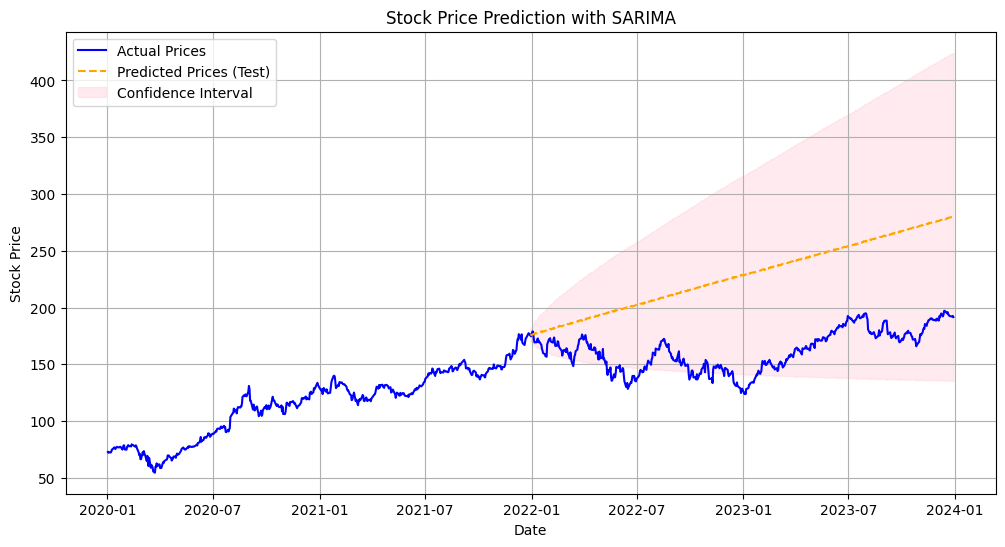

In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Fetch Historical Stock Data
def fetch_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']].copy()  # Ensure we copy the dataframe
    data.reset_index(inplace=True)  # Reset MultiIndex to single index
    data.columns = ['Date', 'Close']  # Rename columns for clarity
    data.dropna(inplace=True)  # Drop NaN values
    return data

stock_symbol = 'AAPL'
data = fetch_stock_data(stock_symbol, '2020-01-01', '2023-12-31')

# Step 2: Prepare Data for SARIMA
# Use only the 'Close' prices for SARIMA model
df = data[['Close']]

# Step 3: Split Data into Training and Test Sets
split_index = int(len(df) * 0.5)  # 50% for training, 50% for testing
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Step 4: Auto-ARIMA to Find Optimal Parameters
stepwise_fit = auto_arima(
    train_data['Close'],
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    d=None,
    seasonal=True,
    m=12,  # Seasonal period (monthly data)
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Optimal Parameters
order = stepwise_fit.order
seasonal_order = stepwise_fit.seasonal_order
print(f"Optimal SARIMA Order: {order}, Seasonal Order: {seasonal_order}")

# Step 5: Fit SARIMA Model
#sarima_model = SARIMAX(
#    train_data['Close'],
#    order=order,
#    seasonal_order=seasonal_order
#)
sarima_model = SARIMAX(
    train_data['Close'],
    order=(7, 1, 5),  # Manual p, d, q
    seasonal_order=(1, 1, 1, 12)  # Manual P, D, Q, s
)


sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

# Step 6: Predict on Test Data
forecast = sarima_fit.get_prediction(start=split_index, end=len(df)-1)
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Step 7: Combine Actual and Predicted Prices into a Single DataFrame
combined_df = data.copy()
combined_df['Predicted'] = np.nan
combined_df.loc[split_index:, 'Predicted'] = predicted_mean.values

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], label="Actual Prices", color="blue")  # Actual prices over the entire range
plt.plot(combined_df['Date'][split_index:], combined_df['Predicted'][split_index:], label="Predicted Prices (Test)", color="orange", linestyle="--")  # Predicted prices only for the test range
plt.fill_between(
    combined_df['Date'][split_index:],
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink', alpha=0.3, label="Confidence Interval"
)
plt.title("Stock Price Prediction with SARIMA")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [23]:
# Auto-ARIMAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò SARIMA ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
stepwise_fit = auto_arima(
    train_data['Close'],           # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞
    start_p=1, start_q=1,          # Ï¥àÍ∏∞ p, q Í∞í
    max_p=5, max_q=5,              # p, q ÏµúÎåÄ Í∞í
    d=None,                        # dÎäî ÏûêÎèôÏúºÎ°ú Í≤∞Ï†ï
    seasonal=True,                 # SARIMA ÌôúÏÑ±Ìôî
    m=12,                          # Í≥ÑÏ†à Ï£ºÍ∏∞ (Ïòà: ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞)
    start_P=0, start_Q=0,          # Ï¥àÍ∏∞ P, Q Í∞í
    max_P=2, max_Q=2,              # P, Q ÏµúÎåÄ Í∞í
    D=None,                        # Í≥ÑÏ†àÏ†Å Ï∞®Î∂Ñ ÌöüÏàòÎèÑ ÏûêÎèô Í≤∞Ï†ï
    trace=True,                    # ÏßÑÌñâ ÏÉÅÌÉú Ï∂úÎ†•
    error_action='ignore',         # Ïò§Î•ò Î¨¥Ïãú
    suppress_warnings=True,        # Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®ÍπÄ
    stepwise=True                  # Îã®Í≥ÑÏ†Å ÌÉêÏÉâ
)

# ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2289.429, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2292.064, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2289.710, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2289.972, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2293.885, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2291.355, Time=1.07 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2291.342, Time=1.03 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2290.555, Time=2.40 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2288.072, Time=0.25 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2289.989, Time=0.70 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2288.955, Time=1.50 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2289.736, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2287.787, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2289.695, Time=0.69 sec
 ARIMA(1,1,0)(1,0,1

## Prophet Î™®Îç∏
- ÏòàÏ∏°Î∞©Î≤ï:
  - Ï†ÑÏ≤¥ ÏòàÏ∏°: Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÏó¨ Ìä∏Î†åÎìú(trend)ÏôÄ Í∏∞ÌÉÄ Ìå®ÌÑ¥(Ïòà: Í≥ÑÏ†àÏÑ±, ÎÖ∏Ïù¥Ï¶à Îì±)ÏùÑ Î™®Îç∏ÎßÅÌïú ÌõÑ, Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ(ÎØ∏Îûò Íµ¨Í∞Ñ)Ïóê ÎåÄÌïú Í∞íÏùÑ ÌïúÍ∫ºÎ≤àÏóê ÏòàÏ∏°ÌïòÎäî Î∞©Ïãù (Trend focused)
  - ÏàúÏ∞® ÏòàÏ∏°:
    - Prophet Î™®Îç∏ÏùÑ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÏ∂∞ ÌïôÏäµ.
    - Îã§Ïùå ÏãúÏ†ê ÌïòÎÇòÎßå ÏòàÏ∏°.
    - ÏòàÏ∏°Îêú Í∞íÏùÑ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞ÄÌïòÏó¨ Îã§Ïãú ÌïôÏäµ Î∞è Îã§Ïùå ÏãúÏ†ê ÏòàÏ∏°.
    - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏòàÏ∏°.
- ÌòÑÏã§Ï†ÅÏù∏ ÏãúÎÇòÎ¶¨Ïò§ÏóêÏÑúÎäî ÏàúÏ∞®Ï†Å ÏòàÏ∏°Ïù¥ Îçî Ï†ÅÌï©Ìï† Ïàò ÏûàÏúºÎ©∞, ProphetÏùÑ ÏÇ¨Ïö©Ìïú ÏàúÏ∞®Ï†Å ÏòàÏ∏°ÏùÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏΩîÎìú ÏûëÏÑ±Ïù¥ ÌïÑÏöî.
- ÏàúÏ∞®Ï†Å ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ÏÑúÎäî ARIMA, LSTM ÎòêÎäî Í∞ïÌôî ÌïôÏäµ Î™®Îç∏Ïù¥ Îçî Ï¢ãÏùÑ Ïàò ÏûàÏùå.
- Prophet ÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÏó¨ ÏòàÏ∏°ÌïòÎäî ÎèÑÍµ¨Î°ú ÏÑ§Í≥ÑÎêòÏóàÏúºÎ©∞ Îã§Ïùå Ìï≠Î™©ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏòàÏ∏°Ìï®.
  - Ï∂îÏÑ∏(Trend): Îç∞Ïù¥ÌÑ∞Ïùò Ïû•Í∏∞Ï†ÅÏù∏ ÏÉÅÏäπ ÎòêÎäî ÌïòÎùΩ Í≤ΩÌñ•
  - Í≥ÑÏ†àÏÑ±(Seasonality): Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®Îêú Î∞òÎ≥µÏ†ÅÏù∏ Ìå®ÌÑ¥(Ïòà: Ï£ºÍ∞Ñ, Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ±)
  - ÏûîÏ∞®(Residual, Noise): Ï∂îÏÑ∏ÏôÄ Í≥ÑÏ†àÏÑ±ÏúºÎ°ú ÏÑ§Î™ÖÎêòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ±(ÎÖ∏Ïù¥Ï¶à). Î∂àÌôïÏã§ÏÑ±ÏùÑ Ïã†Î¢∞ Íµ¨Í∞Ñ(confidence interval)Î°ú Î∞òÏòÅ
- ARIMA ÏôÄ Prophet Î™®Îëê Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î™®Îç∏ÎßÅÌïú ÌõÑ ÎØ∏Îûò Íµ¨Í∞Ñ Ï†ÑÏ≤¥Î•º Ìïú Î≤àÏóê ÏòàÏ∏°ÌïòÎäî Î∞©ÏãùÏùÑ Ï∑®Ìï®
  - ARIMAÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±(Stationarity)ÏùÑ ÎßåÏ°±Ìï¥Ïïº ÌïòÎØÄÎ°ú, ÌïÑÏöî Ïãú Ï∞®Î∂Ñ(Differencing) Í≥ºÏ†ï ÌïÑÏöî
  - ProphetÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ïÏöîÌïòÏßÄ ÏïäÏúºÎ©∞, ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ÎèÑ Ï≤òÎ¶¨ Í∞ÄÎä•


In [24]:
!pip install prophet

[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzektn90j/s7ypro88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzektn90j/szr9garn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71556', 'data', 'file=/tmp/tmpzektn90j/s7ypro88.json', 'init=/tmp/tmpzektn90j/szr9garn.json', 'output', 'file=/tmp/tmpzektn90j/prophet_modelnamere7l/prophet_model-20250111142924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstan

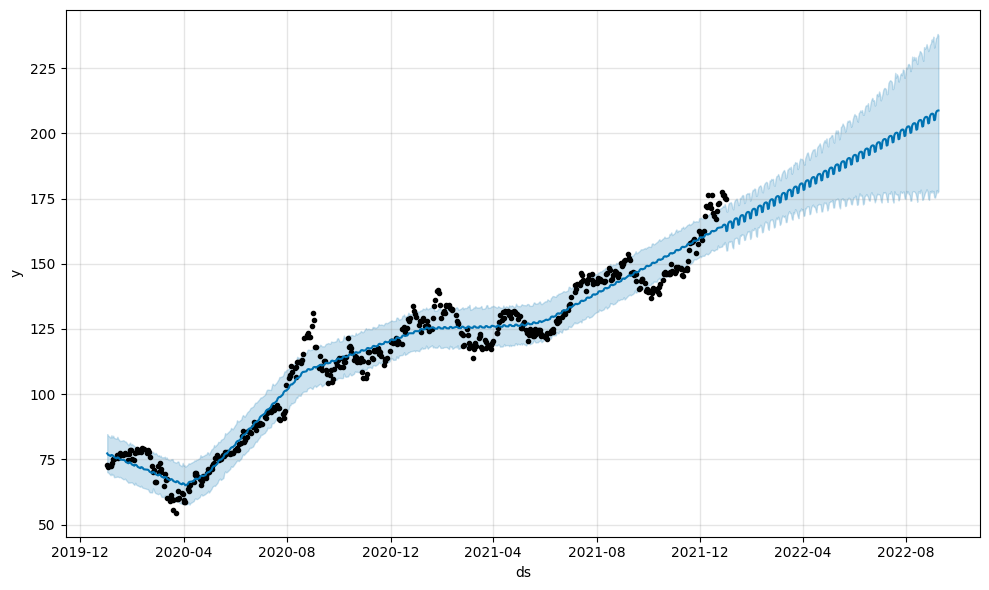

In [26]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
data = fetch_stock_data('AAPL', '2020-01-01', '2023-01-01')
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)  # Prophet ÌòïÏãùÏóê ÎßûÍ≤å Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÍ≤Ω

# Step 2: Train/Test Î∂ÑÎ¶¨
train_data = data[data['ds'] < '2022-01-01']  # 2022ÎÖÑ 1Ïõî Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞
test_data = data[data['ds'] >= '2022-01-01']  # 2022ÎÖÑ 1Ïõî Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞

# Step 3: Prophet Î™®Îç∏ ÌïôÏäµ
model = Prophet()
model.fit(train_data)

# Step 4: ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± Î∞è ÏòàÏ∏°
future = model.make_future_dataframe(periods=len(test_data), freq='D')
forecast = model.predict(future)

# Step 5: ÏãúÍ∞ÅÌôî - Î™®Îç∏ Ìï®Ïàò

model.plot(forecast)
plt.show()


- Í≤ÄÏùÄ Ï†ê: Ïã§Ï†ú Îç∞Ïù¥ÌÉÄ (ÌïôÏäµÎç∞Ïù¥ÌÑ∞)
- ÌååÎûÄ ÏÑ†: Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú Í∞í (ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ Ìè¨Ìï®)
- ÌååÎûÄ ÏòÅÏó≠: Ïã†Î¢∞ Íµ¨Í∞Ñ (Confidence Interval)

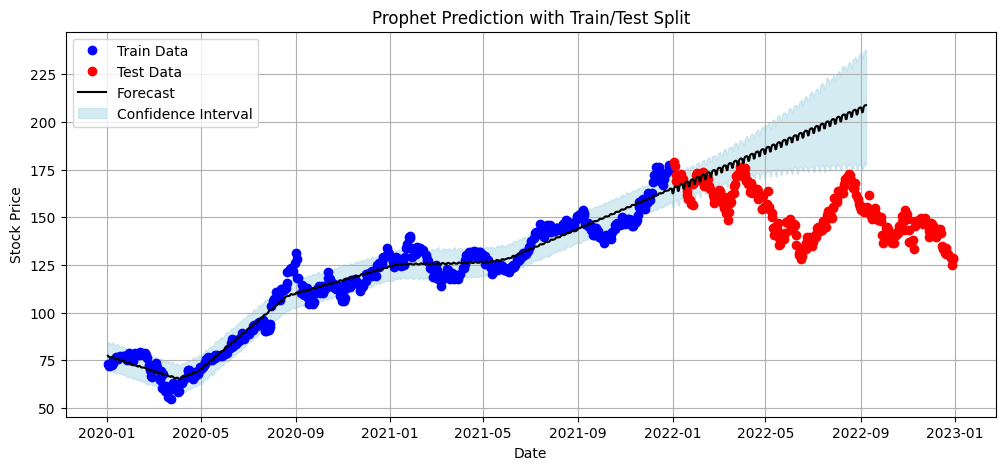

In [27]:
# Ï∂îÍ∞Ä ÏãúÍ∞ÅÌôî - Train/Test Íµ¨Í∞Ñ Íµ¨Î∂Ñ
plt.figure(figsize=(12, 5))
plt.plot(train_data['ds'], train_data['y'], 'bo', label='Train Data')  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
plt.plot(test_data['ds'], test_data['y'], 'ro', label='Test Data')  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
plt.plot(forecast['ds'], forecast['yhat'], 'k-', label='Forecast')  # ÏòàÏ∏° Í∞í
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')
plt.legend()
plt.title("Prophet Prediction with Train/Test Split")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid()
plt.show()

In [ ]:
# ÏÑ±Îä• ÌèâÍ∞Ä
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = test_data['y'].values
y_pred = forecast['yhat'][-len(test_data):].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 35.179844595577386, RMSE: 41.680480894184505


## Prophet - ÏàúÏ∞®Ï†Å ÏòàÏ∏° (Sequential Prediction)
- Prophet Î™®Îç∏ÏùÑ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÏ∂∞ ÌïôÏäµ.
- Îã§Ïùå ÏãúÏ†ê ÌïòÎÇòÎßå ÏòàÏ∏°.
- ÏòàÏ∏°Îêú Í∞íÏùÑ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞ÄÌïòÏó¨ Îã§Ïãú ÌïôÏäµ Î∞è Îã§Ïùå ÏãúÏ†ê ÏòàÏ∏°.
- ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏòàÏ∏°.

In [28]:
# Î°úÍπÖ Î©îÏãúÏßÄ Ï†úÍ±∞
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)  # Prophet Î°úÍ∑∏ Î†àÎ≤® ÏÑ§Ï†ï
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)  # cmdstanpy Î°úÍ∑∏ Î†àÎ≤® ÏÑ§Ï†ï

[*********************100%***********************]  1 of 1 completed
<ipython-input-29-619fbce15bd3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = sequential_predictions  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏòàÏ∏° Í∞í Ï∂îÍ∞Ä


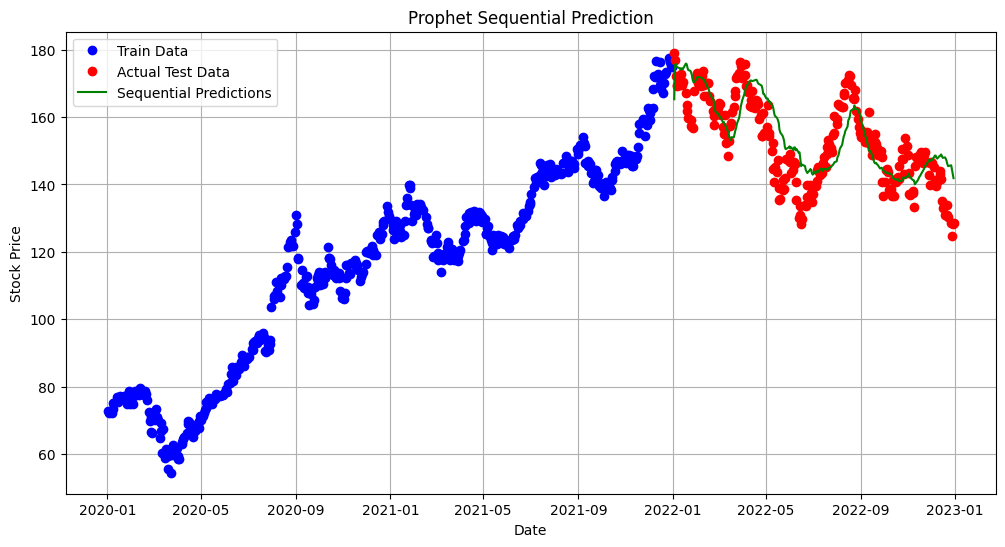

In [29]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
data = fetch_stock_data('AAPL', '2020-01-01', '2023-01-01')
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)  # Prophet ÌòïÏãùÏóê ÎßûÍ≤å Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÍ≤Ω

# Step 2: Train/Test Î∂ÑÎ¶¨
train_data = data[data['ds'] < '2022-01-01']  # 2022ÎÖÑ 1Ïõî Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞
test_data = data[data['ds'] >= '2022-01-01']  # 2022ÎÖÑ 1Ïõî Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞

# Step 3: ÏàúÏ∞®Ï†Å ÏòàÏ∏°ÏùÑ ÏúÑÌïú Ï¥àÍ∏∞Ìôî
history = train_data.copy()  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Ï¥àÍ∏∞ Ïù¥Î†•ÏúºÎ°ú ÏÑ§Ï†ï
sequential_predictions = []  # ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏòàÏ∏°Îêú Í∞íÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

for index, row in test_data.iterrows():
    # Step 4: Prophet Î™®Îç∏ ÌïôÏäµ
    model = Prophet()
    model.fit(history)

    # Step 5: Îã§Ïùå ÏãúÏ†ê ÏòàÏ∏°
    future = pd.DataFrame([{'ds': row['ds']}])  # Ìïú ÏãúÏ†ê ÏòàÏ∏°
    forecast = model.predict(future)
    predicted_value = forecast['yhat'].iloc[0]

    # Step 6: ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
    sequential_predictions.append(predicted_value)

    # Step 7: Ïã§Ï†ú Í∞íÏùÑ historyÏóê Ï∂îÍ∞Ä
    history = pd.concat([history, pd.DataFrame([row])], ignore_index=True)

# Step 8: Í≤∞Í≥º ÏãúÍ∞ÅÌôî
test_data['Predicted'] = sequential_predictions  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏòàÏ∏° Í∞í Ï∂îÍ∞Ä

plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], 'bo', label='Train Data')  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
plt.plot(test_data['ds'], test_data['y'], 'ro', label='Actual Test Data')  # Ïã§Ï†ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
plt.plot(test_data['ds'], test_data['Predicted'], 'g-', label='Sequential Predictions')  # ÏàúÏ∞®Ï†Å ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞
plt.legend()
plt.title("Prophet Sequential Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid()
plt.show()


## LSTM Î™®Îç∏
- Í∞úÎÖê: RNN Í∏∞Î∞òÏùò Îî•Îü¨Îãù Î™®Îç∏Î°ú, ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨.
- Ïû•Ï†ê:
  - ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Ïûò ÌïôÏäµ.
  - ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò Ïû•Í∏∞ Ï¢ÖÏÜçÏÑ± Ï≤òÎ¶¨ Í∞ÄÎä•.
- Îã®Ï†ê:
  - ÌïôÏäµ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶º.
  - Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöî.

- (ÏòàÏ†ú)
  - Í≥†Ï†ïÎêú 60ÏùºÏùò Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Îã§ÏùåÎÇ† Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏° (ÏòàÏ∏°Ìïú Í∞í(predicted_test)Ïù¥ Îã§Ïãú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÎêòÏßÄÎäî ÏïäÏùå.
  - Ï¶â, ÎèÖÎ¶ΩÏ†ÅÏù∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°úÎßå Îã§Ïùå ÎÇ†Ïùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î∞©Ïãù

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 103ms/step - loss: 0.2003 - val_loss: 0.0183
Epoch 2/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - loss: 0.0148 - val_loss: 0.0068
Epoch 3/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 4/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 5/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 17ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 6/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 7/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 8/10
17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - loss: 0.0020 - val_loss: 0.0037

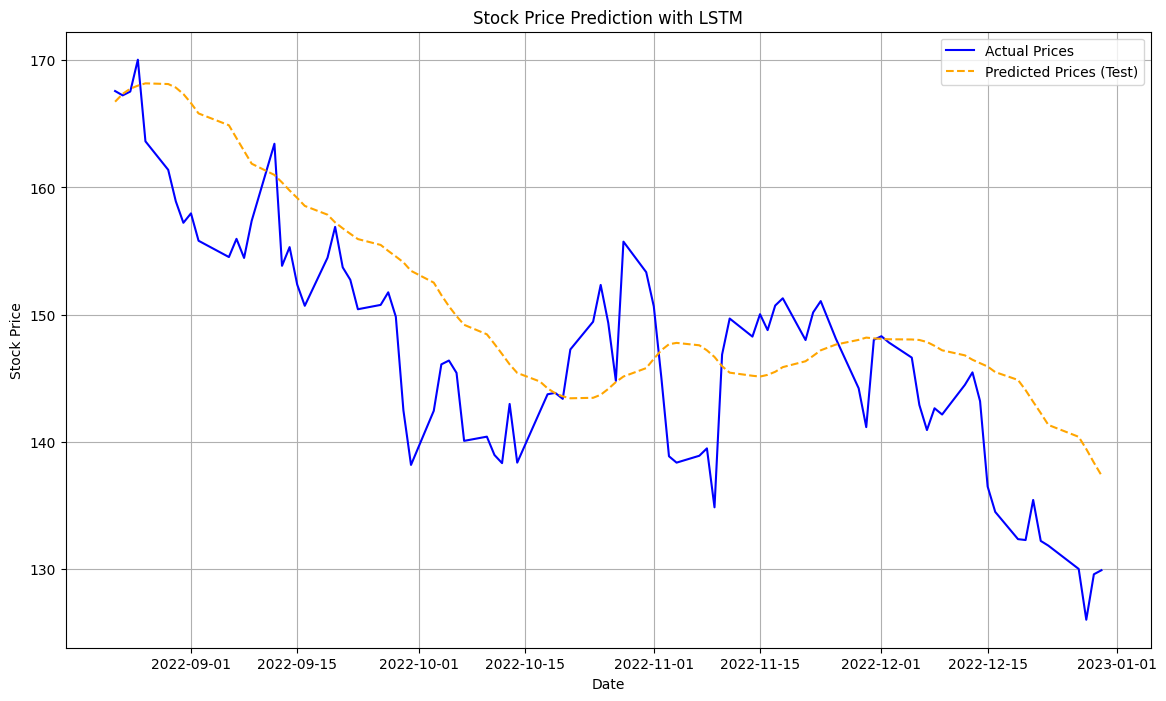

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 1: Fetch Historical Stock Data
def fetch_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']].copy()  # Ensure we copy the dataframe
    data.reset_index(inplace=True)  # Reset MultiIndex to single index
    data.columns = ['Date', 'Close']  # Rename columns for clarity
    data.dropna(inplace=True)  # Drop NaN values
    return data

stock_symbol = 'AAPL'
data = fetch_stock_data(stock_symbol, '2020-01-01', '2023-01-01')

# Step 2: Prepare Data for LSTM
# Use only the 'Close' prices for LSTM model
df = data[['Close']]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

# Split data into training and testing sets
split_index = int(len(data_scaled) * 0.8)  # 80% for training, 20% for testing
train_data = data_scaled[:split_index]
test_data = data_scaled[split_index:]

# Create sequences for LSTM input
sequence_length = 60  # Use 60 days of data to predict the next day

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape data for LSTM (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 3: Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Step 5: Make Predictions
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

# Reverse the scaling
predicted_train = scaler.inverse_transform(predicted_train)
predicted_test = scaler.inverse_transform(predicted_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


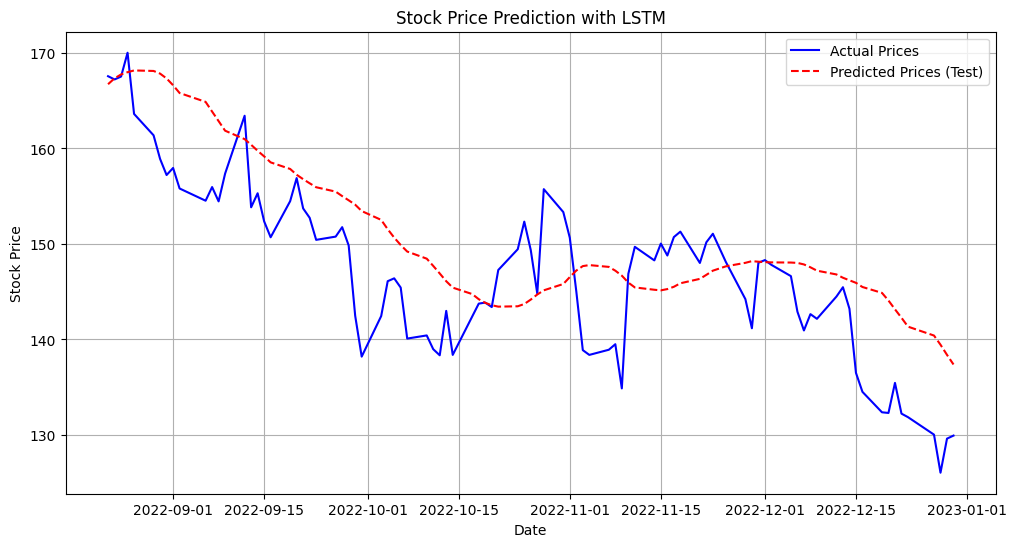

In [ ]:
# Step 6: Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, label="Actual Prices", color="blue")  # Actual prices
plt.plot(data['Date'][-len(predicted_test):], predicted_test, label="Predicted Prices (Test)", color="red", linestyle="--")  # Predicted prices
plt.title("Stock Price Prediction with LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [ ]:
pd.concat([data.head(3), data.tail(3)])

Date       Close
0   2020-01-02   75.087502
1   2020-01-03   74.357498
2   2020-01-06   74.949997
753 2022-12-28  126.040001
754 2022-12-29  129.610001
755 2022-12-30  129.929993

## Í∞ïÌôîÌïôÏäµ
- ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ï£ºÏñ¥ÏßÑ ÏÉÅÌÉú(Ïòà: Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞)ÏóêÏÑú ÌñâÎèô(Ïòà: Îß§Ïàò, Îß§ÎèÑ, Í¥ÄÎßù)ÏùÑ ÏÑ†ÌÉù.
- ÏÑ†ÌÉùÌïú ÌñâÎèôÏóê Îî∞Îùº Î≥¥ÏÉÅ(Ïòà: Ïù¥Ïùµ ÎòêÎäî ÏÜêÏã§)ÏùÑ Î∞õÏùå.
- Î≥¥ÏÉÅÏùÑ Í∑πÎåÄÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú Ï†ïÏ±Ö(Policy)ÏùÑ ÌïôÏäµ.
- Ïï†Ìîå(AAPL) Ï£ºÏãùÏùÑ ÎåÄÏÉÅÏúºÎ°ú, **Ìïú Î≤àÏóê Ìïú Ï£ºÏî© Îß§Ïàò(Market Buy)ÏôÄ Îß§ÎèÑ(Market Sell)**Î•º ÏàòÌñâÌïòÎäî ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ Ïã§ÌñâÌïúÎã§. (Îçî ÌòÑÏã§Ï†ÅÏù∏ ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ ÏúÑÌï¥ Ìïú Î≤àÏóê Ïó¨Îü¨ Ï£ºÎ•º Îß§Ïàò/Îß§ÎèÑÌïòÍ±∞ÎÇò, ÌñâÎèô Í≥µÍ∞ÑÏùÑ ÌôïÏû•ÌïòÏó¨ Îã§ÏñëÌïú ÏàòÎüâÏùÑ Ï≤òÎ¶¨ÌïòÎèÑÎ°ù Î≥ÄÍ≤Ω Í∞ÄÎä•)
- Ïù¥Î•º ÌÜµÌï¥ ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ï£ºÍ∞ÄÏùò Î≥ÄÎèôÏÑ±ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìïú Îß§Ïàò Î∞è Îß§ÎèÑ Ï†ÑÎûµÏùÑ ÌïôÏäµÌïòÍ≥† Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
!pip install gym pandas numpy matplotlib stable-baselines3
!pip install yfinance
!pip install shimmy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 7.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 958.1/958.1 kB 39.9 MB/s eta 0:00:00


- Environment:
  - Í∞ïÌôîÌïôÏäµ ÏóêÏù¥Ï†ÑÌä∏ÏôÄ ÏÉÅÌò∏ÏûëÏö©ÌïòÎäî ÏãúÏä§ÌÖúÏúºÎ°ú, ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÌñâÎèôÏùÑ Ï∑®ÌïòÎ©¥ ÏÉàÎ°úÏö¥ ÏÉÅÌÉúÏôÄ Î≥¥ÏÉÅÏùÑ Î∞òÌôòÌïúÎã§.
  - StockTradingEnvÎäî OpenAI Gym Ïä§ÌÉÄÏùºÎ°ú ÏûëÏÑ±Îêú ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌôòÍ≤Ω.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import gym
from gym import spaces
from stable_baselines3 import DQN
import matplotlib.pyplot as plt

# Step 1: Fetch Historical Stock Data
def fetch_stock_data(stock_symbol, start_date, end_date):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[['Close']]                        # Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞
    data['Returns'] = data['Close'].pct_change()  # ÏàòÏùµÎ•† Í≥ÑÏÇ∞ (Îëê Ïó∞ÏÜç Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò Î≥ÄÌôîÏú®)
    data.dropna(inplace=True)
    return data

stock_symbol = 'AAPL'
data = fetch_stock_data(stock_symbol, '2020-01-01', '2023-01-01')

# Step 2: Define the Stock Trading Environment
class StockTradingEnv(gym.Env):

    # Ï¥àÍ∏∞ ÏÉÅÌÉú ÏÑ§Ï†ï
    # ÏûîÍ≥†(balance), Ìè¨ÏßÄÏÖò(Î≥¥Ïú† Ï£ºÏãù Ïàò), ÌòÑÏû¨Îã®Í≥Ñ (ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌòÑÏû¨ ÏãúÏ†ê)
    def __init__(self, data):
        super(StockTradingEnv, self).__init__()
        self.data = data
        self.current_step = 0
        self.balance = 10000  # Ï¥àÍ∏∞ ÏûêÎ≥∏
        self.position = 0     # ÌòÑÏû¨ Î≥¥Ïú†Îüâ
        self.done = False

        # ÏÉÅÌÉú Í≥µÍ∞Ñ: [ÌòÑÏû¨ Ï£ºÍ∞Ä, ÏàòÏùµÎ•†, Î≥¥Ïú†Îüâ]
        # spaces.Box()Îäî OpenAI Gym ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÌÅ¥ÎûòÏä§ Ï§ë ÌïòÎÇòÎ°ú, Ïó∞ÏÜçÌòï ÏÉÅÌÉú Í≥µÍ∞Ñ ÎòêÎäî Ïó∞ÏÜçÌòï
        # ÌñâÎèô Í≥µÍ∞ÑÏùÑ Ï†ïÏùòÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêúÎã§. Ïù¥Î•º ÌÜµÌï¥ ÌôòÍ≤ΩÏùò ÏÉÅÌÉúÎÇò ÌñâÎèôÏù¥ ÌäπÏ†ï Î≤îÏúÑ ÎÇ¥Ïùò Ïã§Ïàò(float) Í∞íÏúºÎ°ú
        # ÌëúÌòÑÎê† Ïàò ÏûàÎã§.
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)

        # ÌñâÎèô Í≥µÍ∞Ñ: [0 = Í¥ÄÎßù, 1 = Îß§Ïàò, 2 = Îß§ÎèÑ]
        self.action_space = spaces.Discrete(3)

    def reset(self):
        self.current_step = 0
        self.balance = 10000
        self.position = 0
        self.done = False
        return self._next_observation()

    def step(self, action):
        prev_price = self.data['Close'].iloc[self.current_step].item()

        # ÌñâÎèôÏóê Îî∞Î•∏ ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏
        if action == 1:  # Îß§Ïàò
            if self.balance >= prev_price:  # ÏûîÍ≥†Í∞Ä Ï∂©Î∂ÑÌïú Í≤ΩÏö∞
                self.position += 1          # Î≥¥Ïú† Ï£ºÏãù 1 Ï¶ùÍ∞Ä
                self.balance -= prev_price  # ÏûîÍ≥†ÏóêÏÑú Îß§Ïàò Í∞ÄÍ≤© Ï∞®Í∞ê
        elif action == 2:  # Îß§ÎèÑ
            if self.position > 0:           # Î≥¥Ïú† Ìè¨ÏßÄÏÖòÏù¥ ÏûàÏùÑ Í≤ΩÏö∞
                self.position -= 1          # Î≥¥Ïú† Ï£ºÏãù 1 Í∞êÏÜå
                self.balance += prev_price  # ÏûîÍ≥†Ïóê Îß§ÎèÑ Í∞ÄÍ≤© Ï∂îÍ∞Ä

        # Îã§Ïùå Ïä§ÌÖùÏúºÎ°ú Ïù¥Îèô
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            self.done = True

        # Î≥¥ÏÉÅ Í≥ÑÏÇ∞ (Îß§Ïàò ÌõÑ Ï£ºÍ∞Ä ÏÉÅÏäπ ‚Üí Í∏çÏ†ïÏ†Å Î≥¥ÏÉÅ. Îß§ÎèÑ ÌõÑ Ï£ºÍ∞Ä ÌïòÎùΩ ‚Üí Í∏çÏ†ïÏ†Å Î≥¥ÏÉÅ.)
        current_price = self.data['Close'].iloc[self.current_step].item()
        reward = (current_price - prev_price) * self.position    # Ï£ºÍ∞Ä Î≥ÄÌôîÏóê Îî∞Î•∏ Î≥¥ÏÉÅ
        return self._next_observation(), reward, self.done, {}   # next_state, reward, done

    def _next_observation(self):
        return np.array([
            self.data['Close'].iloc[self.current_step].item(),
            self.data['Returns'].iloc[self.current_step].item(),
            self.position
        ], dtype=np.float32)

# Step 3: Train the DQN Model
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†®Îê®
# MlpPolicy: Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†(MLP) Ïã†Í≤ΩÎßùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÉÅÌÉú-ÌñâÎèô Í∞íÏùÑ ÌïôÏäµ
env = StockTradingEnv(data)
model = DQN("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=50000)  # ÏóêÏù¥Ï†ÑÌä∏Í∞Ä 50,000Î≤àÏùò ÌñâÎèôÏùÑ Ï∑®ÌïòÎ©∞ ÏµúÏ†ÅÌôîÎêú Ï†ïÏ±ÖÏùÑ ÌïôÏäµ.
                                    # Ïó¨Îü¨ Í∞úÏùò episode Î°ú Íµ¨ÏÑ±
model.save("stock_trading_agent")

# Step 4: Test the Trained Model
state = env.reset()
done = False

actions = []         # ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌñâÎèô Í∏∞Î°ù
prices = []          # Í∞Å Ïä§ÌÖùÏùò Ï£ºÍ∞Ä
balances = []        # Í∞Å Ïä§ÌÖùÏùò ÏûîÍ≥† Í∏∞Î°ù
positions = []       # Î≥¥Ïú† Ï£ºÏãù Ïàò

while not done:
    action, _states = model.predict(state)
    state, reward, done, _ = env.step(action)

    # ÌñâÎèô Î∞è ÌòÑÏû¨ ÏÉÅÌÉú Í∏∞Î°ù
    actions.append(action)
    prices.append(state[0])     # ÌòÑÏû¨ Ï£ºÍ∞Ä
    balances.append(env.balance)
    positions.append(env.position)


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


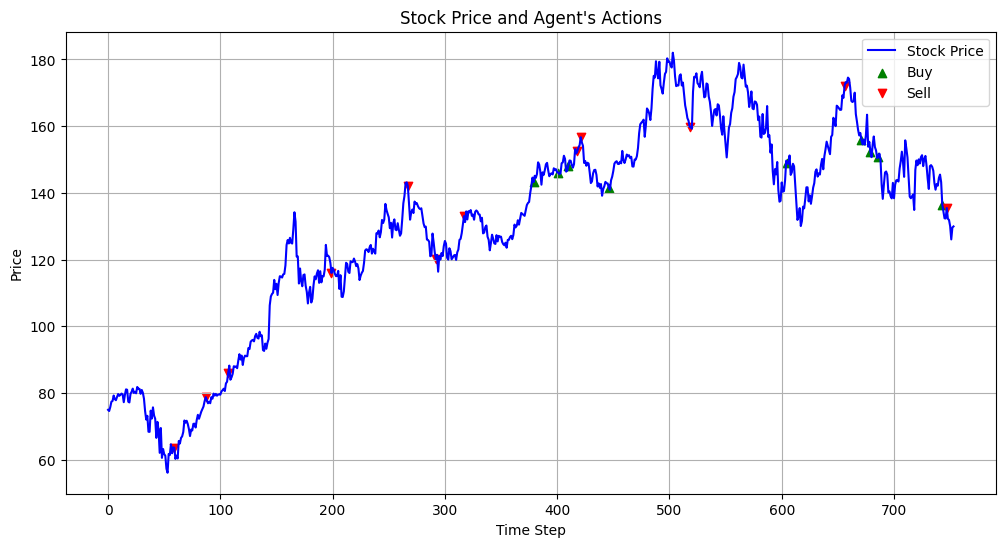

In [ ]:
# Step 5: Plotting Results
# Îß§Ïàò Î∞è Îß§ÎèÑ Ìè¨Ïù∏Ìä∏ Í≥ÑÏÇ∞
buy_points = [prices[i] if actions[i] == 1 else None for i in range(len(actions))]
sell_points = [prices[i] if actions[i] == 2 else None for i in range(len(actions))]

# Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏôÄ ÌñâÎèô ÌîåÎ°Ø
plt.figure(figsize=(12, 6))
plt.plot(prices, label="Stock Price", color="blue")
plt.scatter(range(len(prices)), buy_points, color="green", label="Buy", marker="^", alpha=1)
plt.scatter(range(len(prices)), sell_points, color="red", label="Sell", marker="v", alpha=1)
plt.title("Stock Price and Agent's Actions")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


1. ÌñâÎèô Ìå®ÌÑ¥ (Stock Price and Agent's Actions)
- Îß§Ïàò/Îß§ÎèÑ ÏãúÏ†ê:
  - ÏóêÏù¥Ï†ÑÌä∏Îäî ÏÉÅÏäπ Ï∂îÏÑ∏ ÌõÑÏóê Îß§ÏàòÌïòÍ±∞ÎÇò, ÌïòÎùΩ Ï∂îÏÑ∏ÏóêÏÑú Îß§ÎèÑÌïòÎäî Í≤ΩÏö∞Í∞Ä Î≥¥ÏûÑ.
  - ÏùºÎ∂Ä ÌñâÎèôÏùÄ ÏµúÏ†ÅÏùò ÌÉÄÏù¥Î∞çÏù¥ ÏïÑÎãå Í≤ΩÏö∞ÎèÑ ÏûàÏùå.
- ÌñâÎèô ÎπàÎèÑ:
  - Îß§ÏàòÏôÄ Îß§ÎèÑ ÌöüÏàòÍ∞Ä ÎπÑÍµêÏ†Å Ï†ÅÏùå.
  - ÎßéÏùÄ Íµ¨Í∞ÑÏóêÏÑú Í¥ÄÎßù(Hold) ÏÉÅÌÉúÎ•º Ïú†ÏßÄ.
- ÏµúÏ†ÅÌôî Î∂ÄÏ°±:
  - ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌñâÎèôÏù¥ ÏãúÏû• ÌùêÎ¶ÑÍ≥º Ïûò ÎßûÏßÄ ÏïäÎäî Íµ¨Í∞ÑÏù¥ Ï°¥Ïû¨:
    - Ïòà: ÏÉÅÏäπ Ï¥àÍ∏∞Ïóê Îß§ÏàòÌïòÏßÄ ÏïäÍ≥†, ÌõÑÎ∞òÎ∂ÄÏóê Îß§ÏàòÌïòÎäî ÌñâÎèô.
    - ÌïòÎùΩ Ï¥àÍ∏∞Ïóê Îß§ÎèÑÌïòÏßÄ ÏïäÍ≥†, ÌõÑÎ∞òÎ∂ÄÏóê Îß§ÎèÑÌïòÎäî ÌñâÎèô.


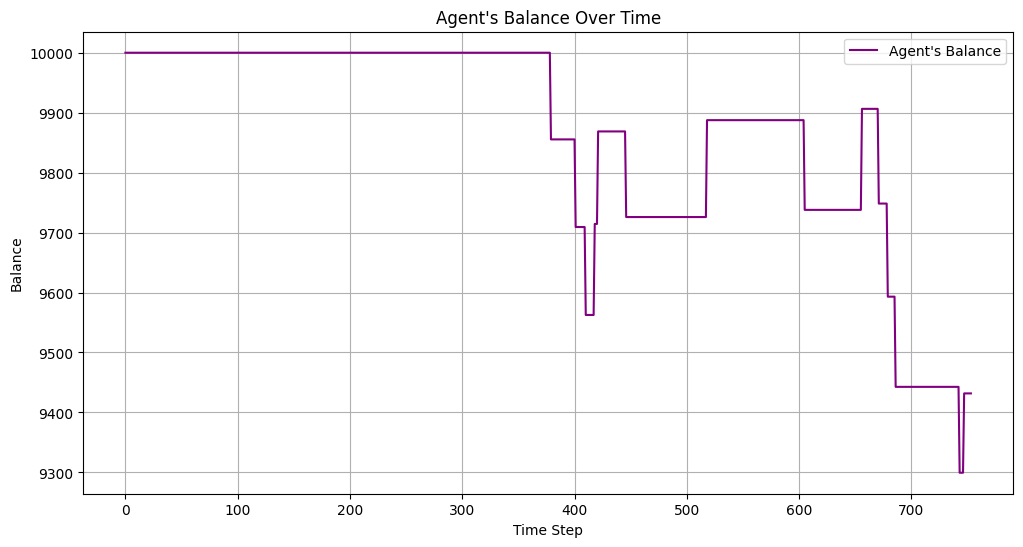

In [ ]:
# ÏûîÍ≥† Î≥ÄÌôî ÌîåÎ°Ø
plt.figure(figsize=(12, 6))
plt.plot(balances, label="Agent's Balance", color="purple")
plt.title("Agent's Balance Over Time")
plt.xlabel("Time Step")
plt.ylabel("Balance")
plt.legend()
plt.grid()
plt.show()


2. ÏûîÍ≥† Î≥ÄÌôî (Agent's Balance Over Time)
- ÏûîÍ≥† Í∞êÏÜå:
  - ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏûîÍ≥†Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Í∞êÏÜå.
  - Ïù¥Îäî ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÏÜêÏã§ÏùÑ Î≥¥Í≥† ÏûàÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏.
- Îß§Ïàò/Îß§ÎèÑÏóê Îî∞Î•∏ Î≥ÄÌôî:
  - ÏûîÍ≥†Ïùò Í∏âÍ≤©Ìïú ÌïòÎùΩÏùÄ ÏûòÎ™ªÎêú Îß§Ïàò ÎòêÎäî Îß§ÎèÑÎ°ú Ïù∏Ìï¥ ÏÜêÏã§Ïù¥ Î∞úÏÉùÌïú Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.
  - Ïòà: Í≥†Ï†êÏóêÏÑú Îß§Ïàò ÌõÑ Í∞ÄÍ≤©Ïù¥ ÌïòÎùΩÌïòÍ±∞ÎÇò, Ï†ÄÏ†êÏóêÏÑú Îß§ÎèÑ ÌõÑ Í∞ÄÍ≤©Ïù¥ ÏÉÅÏäπ.
- Í¥ÄÎßù Íµ¨Í∞Ñ:
  - ÏûîÍ≥†Í∞Ä ÏùºÏ†ïÌïòÍ≤å Ïú†ÏßÄÎêòÎäî Íµ¨Í∞ÑÏù¥ ÎßéÏùå ‚Üí Í¥ÄÎßù ÏÉÅÌÉúÏóêÏÑú ÏûîÍ≥† Î≥ÄÌôîÍ∞Ä ÏóÜÏùå.

### Í∞úÏÑ†Ï†ê ###
1. Î≥¥ÏÉÅ Ìï®Ïàò Í∞úÏÑ†
  - ÌòÑÏû¨ Î≥¥ÏÉÅ Ìï®ÏàòÎäî Îã®ÏàúÌûà Ï£ºÍ∞Ä Î≥ÄÌôîÏôÄ Î≥¥Ïú† Ï£ºÏãù ÏàòÏóê ÏùòÏ°¥:

     ```reward = (current_price - prev_price) * self.position```
  - Í∞úÏÑ† Î∞©Ïïà:
    - Ïû•Í∏∞Ï†Å ÏàòÏùµÎ•†ÏùÑ Í≥†Î†§Ìïú Î≥¥ÏÉÅ: Î≥¥Ïú† Í∏∞Í∞Ñ ÎèôÏïàÏùò ÏàòÏùµÎ•†ÏùÑ Ìè¨Ìï®.
  - Í±∞Îûò ÎπÑÏö© Î∞òÏòÅ: Îß§Ïàò/Îß§ÎèÑ Ïãú ÏàòÏàòÎ£å ÎòêÎäî ÏÑ∏Í∏àÏùÑ Ï∂îÍ∞Ä.
  - ÌñâÎèô ÎπàÎèÑ ÌéòÎÑêÌã∞: Î∂àÌïÑÏöîÌïú Îß§Ïàò/Îß§ÎèÑ ÌñâÎèôÏóê ÌéòÎÑêÌã∞Î•º Î∂ÄÏó¨.

2. ÌñâÎèô Í≥µÍ∞Ñ ÌôïÏû•
  - ÌòÑÏû¨Îäî Îã®ÏàúÌûà Îß§Ïàò, Îß§ÎèÑ, Í¥ÄÎßùÎßå Í∞ÄÎä•.
  - Ìïú Î≤àÏóê Ïó¨Îü¨ Ï£ºÎ•º Í±∞ÎûòÌï† Ïàò ÏûàÎèÑÎ°ù ÌñâÎèô Í≥µÍ∞ÑÏùÑ ÌôïÏû•

     ```self.action_space = spaces.Discrete(5)  # Ïòà: 1Ï£º, 5Ï£º Îã®ÏúÑÎ°ú Îß§Ïàò/Îß§ÎèÑ ```
3. Îçî Í∏¥ ÌïôÏäµ ÏãúÍ∞Ñ
  - ÌïôÏäµ ÌÉÄÏûÑÏä§ÌÖù(total_timesteps=50000)ÏùÑ ÎäòÎ†§ Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ.
  - Ï¥àÍ∏∞ ÌÉêÌóò(Exploration) Îã®Í≥ÑÎ•º Ï∂©Î∂ÑÌûà ÎäòÎ†§ Îã§ÏñëÌïú ÌñâÎèôÏùÑ ÏãúÎèÑÌïòÍ≤å Ìï®.
4. Îç∞Ïù¥ÌÑ∞ Îã§ÏñëÌôî
  - Îã®Ïùº Ï£ºÏãù Îç∞Ïù¥ÌÑ∞(AAPL) ÎåÄÏã† Îã§ÏñëÌïú Ï£ºÏãù Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏùºÎ∞òÌôîÎêú Ï†ÑÎûµ ÌïôÏäµ.
  - Ïòà: Ïó¨Îü¨ Ï£ºÏãù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Íµ¨ÏÑ±ÌïòÍ±∞ÎÇò, Îã§Î•∏ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Ìè¨Ìï®.
5. Í∞ïÌôîÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶ò Í∞úÏÑ†
  - DQN ÎåÄÏã† Îçî Ï†ïÍµêÌïú ÏïåÍ≥†Î¶¨Ï¶ò(PPO, A2C Îì±)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµ ÏÑ±Îä• Ìñ•ÏÉÅ.
  - PPO(A2C)Îäî Ïó∞ÏÜçÏ†ÅÏù¥Í≥† Îçî Î≥µÏû°Ìïú ÌñâÎèô Í≥µÍ∞ÑÏóêÏÑúÎèÑ Îçî ÏïàÏ†ïÏ†ÅÏù∏ ÌïôÏäµ Í∞ÄÎä•.
6. ÌôòÍ≤ΩÏùò ÏÉÅÌÉú Í≥µÍ∞Ñ ÌôïÏû•
  - ÌòÑÏû¨ ÏÉÅÌÉú Í≥µÍ∞ÑÏùÄ [ÌòÑÏû¨ Ï£ºÍ∞Ä, ÏàòÏùµÎ•†, Î≥¥Ïú†Îüâ]ÏúºÎ°ú Ï†úÌïú.
  - ÏÉÅÌÉú Í≥µÍ∞ÑÏóê Îã§Ïùå ÏöîÏÜåÎ•º Ï∂îÍ∞Ä:
    - Ïù¥Îèô ÌèâÍ∑†(Moving Average): Ï£ºÍ∞Ä Ï∂îÏÑ∏Î•º Îçî Î™ÖÌôïÌûà ÌååÏïÖ.
    - Í±∞ÎûòÎüâ(Volume): ÏãúÏû•Ïùò Ïú†ÎèôÏÑ± Í≥†Î†§.
    - ÏÉÅÎåÄ Í∞ïÎèÑ ÏßÄÏàò(RSI): Í≥ºÎß§Ïàò/Í≥ºÎß§ÎèÑ Ïó¨Î∂Ä ÌååÏïÖ.

# Assignment:

Í≥ºÏ†ú Í∞úÏöî
1. Î™©Ìëú:
  - Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î°ú Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÍ≥†, Îã§ÏñëÌïú ÏòàÏ∏° Î™®Îç∏ÏùÑ ÎπÑÍµêÌïú ÌõÑ, Excel Î≥¥Í≥†ÏÑúÎ•º ÏÉùÏÑ±Ìï¥ Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨.
2. Íµ¨ÏÑ± ÏöîÏÜå:
  - Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî
  - ÏòàÏ∏° Î™®Îç∏ ÌïôÏäµ Î∞è Í≤∞Í≥º ÎπÑÍµê (ÏµúÏÜå 2Í∞ú Ïù¥ÏÉÅÏùò Î™®Îç∏)
  - Excel ÌååÏùº ÏÉùÏÑ±: ÏòàÏ∏° Í≤∞Í≥º, Í∑∏ÎûòÌîÑ, Î™®Îç∏ ÎπÑÍµêÌëú Ìè¨Ìï®
  - Î≥¥Í≥†ÏÑú ÏöîÏïΩ ÏûëÏÑ±

Í≥ºÏ†úÎã®Í≥Ñ
1. Îç∞Ïù¥ÌÑ∞ Ï†úÍ≥µ Î∞è Ï†ÑÏ≤òÎ¶¨
  - Îç∞Ïù¥ÌÑ∞: Yahoo FinanceÏóêÏÑú Îã§Ïö¥Î°úÎìúÌïú Ï£ºÏãù Îç∞Ïù¥ÌÑ∞ (e.g., S&P500, ÌäπÏ†ï Í∏∞ÏóÖ)
  - Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ÏôÄ Ï†ÑÏ≤òÎ¶¨
    - ÎÇ†ÏßúÎ≥Ñ Ï£ºÍ∞Ä Ï∞®Ìä∏ ÏÉùÏÑ±
    - Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (ÏûàÎã§Î©¥)
    - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
2. Î™®Îç∏ ÌïôÏäµ
  - Îëê Í∞ÄÏßÄ Ïù¥ÏÉÅ ÎòêÎäî ÌïòÏù¥Î∏åÎ¶¨Îìú Î™®Îç∏ (Í∂åÏû•)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°:
    - LSTM: Îî•Îü¨Îãù Î™®Îç∏Î°ú ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    - ARIMA: ÌÜµÍ≥ÑÏ†Å Î™®Îç∏
    - Prophet ÎòêÎäî Í∞ÑÎã®Ìïú ÏÑ†Ìòï ÌöåÍ∑Ä Ï∂îÍ∞Ä Í∞ÄÎä•
    - Hybrid Model: ARIMA/Prophet (Ïû•Í∏∞Ï∂îÏÑ∏) + Î®∏Ïã†Îü¨Îãù/Îî•Îü¨Îãù Î™®Îç∏ (Îã®Í∏∞Î≥ÄÎèô ÏòàÏ∏°)
  - Í∞Å Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÍ≥† ÎπÑÍµê:
    - ÏòàÏ∏° Í∞íÍ≥º Ïã§Ï†ú Í∞íÏùò Ï∞®Ïù¥Î•º Î≥¥Ïó¨Ï£ºÎäî Í∑∏ÎûòÌîÑ
    - RMSE ÎòêÎäî MAEÏôÄ Í∞ôÏùÄ ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
3. Excel Î≥¥Í≥†ÏÑú ÏÉùÏÑ±
  - Excel ÌååÏùº ÏûëÏÑ±:
    - ÏòàÏ∏° Í≤∞Í≥º ÏöîÏïΩ (ÌÖåÏù¥Î∏î ÌòïÌÉúÎ°ú Ï†ïÎ¶¨)
    - ÏòàÏ∏°Í≥º Ïã§Ï†ú Ï£ºÍ∞ÄÏùò ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÇΩÏûÖ
    - Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµêÌëú ÏûëÏÑ±
  - Excel Î≥¥Í≥†ÏÑú Ìï≠Î™© ÏòàÏãú:
    - ÏãúÌä∏ 1: Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Í∞Ñ, Î∂ÑÌè¨ Îì±
    - ÏãúÌä∏ 2: ÏòàÏ∏° Í≤∞Í≥º: Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° Í∞í, Ïã§Ï†ú Í∞í, Ïò§Ï∞®
    - ÏãúÌä∏ 3: Í∑∏ÎûòÌîÑ: ÎÇ†ÏßúÎ≥Ñ Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞í ÎπÑÍµê Í∑∏ÎûòÌîÑ
    - ÏãúÌä∏ 4: Î™®Îç∏ ÎπÑÍµê: RMSE, MAE Îì± ÏßÄÌëúÎ°ú Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
4. ÏµúÏ¢Ö Î≥¥Í≥†ÏÑú ÏöîÏïΩ
  - Î≥¥Í≥†ÏÑú ÎÇ¥Ïö©:
    - ÌîÑÎ°úÏ†ùÌä∏ Î™©Ìëú
    - Îç∞Ïù¥ÌÑ∞ Î∞è Î™®Îç∏ ÏÑ§Î™Ö
    - Í≤∞Í≥º Î∂ÑÏÑù (ÏòàÏ∏° ÏÑ±Îä• ÎπÑÍµê, Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄÏùò Ï∞®Ïù¥)
    - Í≤∞Î°† Î∞è Í∞úÏÑ† Í∞ÄÎä•ÏÑ± Ï†úÏïà
  - Excel Î≥¥Í≥†ÏÑúÎ•º Í∏∞Î∞òÏúºÎ°ú Í∞ÑÎã®Ìïú PPTÎÇò Word Î≥¥Í≥†ÏÑú ÏöîÏïΩ ÏûëÏÑ±.
  - ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏöîÏïΩÌïú Í∞ÑÎã®Ìïú Î≥¥Í≥†ÏÑúÎ•º ÏûëÏÑ±ÌïòÍ≥† Ïù¥Î•º Í≤ΩÏòÅ Ï†ÑÎûµÏóê Ïñ¥ÎñªÍ≤å ÌôúÏö©Ìï† Ïàò ÏûàÏùÑÏßÄ Í≤∞Î°†.



# Exercise

- pd.pct_change(): Ïó∞ÏÜç Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÌôîÏú®ÏùÑ Í≥ÑÏÇ∞ (percent change)

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Price': [100, 105, 110, 120, 115]
})

# Ïó∞ÏÜçÎêú Í∞íÏùò Î≥ÄÌôîÏú® Í≥ÑÏÇ∞: (current_val - pre_val)/prev_val
data['Percent Change'] = data['Price'].pct_change()
print(data)

   Price  Percent Change
0    100             NaN
1    105        0.050000
2    110        0.047619
3    120        0.090909
4    115       -0.041667


- Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùºÏùº ÏàòÏùµÎ•† Í≥ÑÏÇ∞:

In [ ]:
import yfinance as yf

data = yf.download('AAPL', start='2023-01-01', end='2023-01-10')
data['Daily Returns'] = data['Close'].pct_change()
print(data[['Close', 'Daily Returns']])

[*********************100%***********************]  1 of 1 completed

Price            Close Daily Returns
Ticker            AAPL              
Date                                
2023-01-03  125.070000           NaN
2023-01-04  126.360001      0.010314
2023-01-05  125.019997     -0.010605
2023-01-06  129.619995      0.036794
2023-01-09  130.149994      0.004089


- spaces.Box(): OpenAI Gym ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÌÅ¥ÎûòÏä§ Ï§ë ÌïòÎÇòÎ°ú, Ïó∞ÏÜçÌòï ÏÉÅÌÉú Í≥µÍ∞Ñ ÎòêÎäî Ïó∞ÏÜçÌòï ÌñâÎèô Í≥µÍ∞ÑÏùÑ Ï†ïÏùòÌïòÎäî Îç∞ ÏÇ¨Ïö©.

In [ ]:
# Îã®Ïàú Ïó∞ÏÜçÌòï ÏÉÅÌÉú Í≥µÍ∞Ñ Ï†ïÏùò

from gym import spaces

# ÏÉÅÌÉú Í≥µÍ∞Ñ: Í∞íÏù¥ [-1, 1] ÏÇ¨Ïù¥Ïùò 3Ï∞®Ïõê Î≤°ÌÑ∞
state_space = spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)

print("State Space:")
print(state_space)

# ÏÉòÌîå Í∞í ÏÉùÏÑ±
sample = state_space.sample()
print("Sample State:", sample)

State Space:
Box(-1.0, 1.0, (3,), float32)
Sample State: [-0.33671418  0.38855466 -0.87203103]


- Regular Expression

In [ ]:
import re
text = "-> $156.78"
match = re.search(r"->\s*\$(\d+\.\d+)", text)    # Regex with a capturing group ('()' Î°ú Ï†ïÏùò)
print(match, "\n", match.group(0), "\n", match.group(1))    # group(0) Îäî Ï†ÑÏ≤¥

<re.Match object; span=(0, 10), match='-> $156.78'> 
 -> $156.78 
 156.78
